<a href="https://colab.research.google.com/github/fergogu27-ctrl/EDPII/blob/main/Prueba_de_los_promedios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRUEBA DE LOS PROMEDIOS**

Es una prueba que nos sirve para verificar que la muestra $x_i$ proviene de una distrubución $U(0,1)$

In [1]:
import scipy.stats as st    #calcular el valor de l estadistico za/2 distribuciones de probabilidad y estadística
import numpy as np          #Cálculo numérico y manejo de arreglos (vectores/matrices)
import tabulate             #Imprime tablas
import matplotlib.pyplot as plt   #Nos ayuda a graficar

In [2]:
data = [                    #Ingresamos lo datos de la tabla 3.1
    0.78961, 0.05230, 0.10699, 0.55877, 0.14151,
    0.76086, 0.12079, 0.27738, 0.65726, 0.79269,
    0.80548, 0.82654, 0.29453, 0.20852, 0.42989,
    0.58518, 0.98611, 0.34488, 0.34358, 0.11537,
    0.89898, 0.57880, 0.67621, 0.05010, 0.00121,
    0.28269, 0.73059, 0.70119, 0.18284, 0.49962,
    0.38618, 0.76910, 0.68334, 0.55170, 0.10850,
    0.79982, 0.45679, 0.21631, 0.87616, 0.55743,
    0.58962, 0.33216, 0.03185, 0.61168, 0.09264,
    0.69623, 0.17028, 0.05475, 0.91512, 0.76262,
    0.29931, 0.30861, 0.83358, 0.51781, 0.03272,
    0.57410, 0.26593, 0.85903, 0.43308, 0.35286,
    0.24000, 0.65559, 0.38507, 0.90829, 0.94187,
    0.93655, 0.88809, 0.81772, 0.36982, 0.19904,
    0.54325, 0.62400, 0.09133, 0.41678, 0.33954,
    0.58244, 0.85853, 0.88752, 0.33729, 0.15506,
    0.23949, 0.53559, 0.33381, 0.49383, 0.75103,
    0.19962, 0.65002, 0.74579, 0.79118, 0.63453,
    0.19147, 0.40644, 0.08128, 0.73485, 0.22724,
    0.22287, 0.07281, 0.64183, 0.44267, 0.72102
]


Prueba estadisticas para los números pseudoaleatorios.
Para esto podemos plantear una prueba de hipotesis de promedios donde probaremos que los números generados provienen de un universo uniforme con media de 0.5.

Establecemos una hipotesis nula $H_0$ la cual se debe de probar y una hipotesis alternativa  $H_a$ (hipotesis de investigación) describira lo que se concluirá si se rechaza la hipotesis nula

Las hipotesis son:

Hipotesis nula: $$H_0:u=\frac{1}{2}$$
Hipotesis alternativa: $$H_a: u\neq \frac{1}{2}$$

Promedio muestral: $$
\bar{x} = \frac{U_1+U_2+...+U_N}{N}
$$

Estadístico de prueba $Z_0$:
$$Z_0 = \frac{(\bar{x} - 0.5)\sqrt{N}}{\sqrt{\frac{1}{12}}}$$
Donde 0.5 es la media de una distribución $U(0,1)$ y $1/12$ es la varianza

In [3]:
def promedio(data, alfa):     #Definimos promedio con los datos de la muesta y el nivel de significacnia

  x= np.mean(data)            #Calculamos el promedio muestra
  N=len(data)                 #Indicamos el tamaño de la muestra con las datos previamente definidos

  z=(x-0.5)*np.sqrt(N)/np.sqrt(1/12)  #Calculamos ell estadistico z_0

  z_c = st.norm.ppf(1-alfa/2)         #Calculamos el valor crítico

  if abs(z)<z_c:
    print("No se rechaza H_0: La muestra proviene de una distribución U(0,1)" )
  else:
    print("SE rechaza H_0: La muestra proviene de una distribución U(0,1)")

  return x, z, z_c

In [4]:
x, z, z_c = promedio(data, 0.05)  #Calculamos el promedio, indicando alfa=0.05
print(x)
print(z)
print(z_c)

No se rechaza H_0: La muestra proviene de una distribución U(0,1)
0.4823493
-0.6114381837831203
1.959963984540054


Gráfica de secuencia

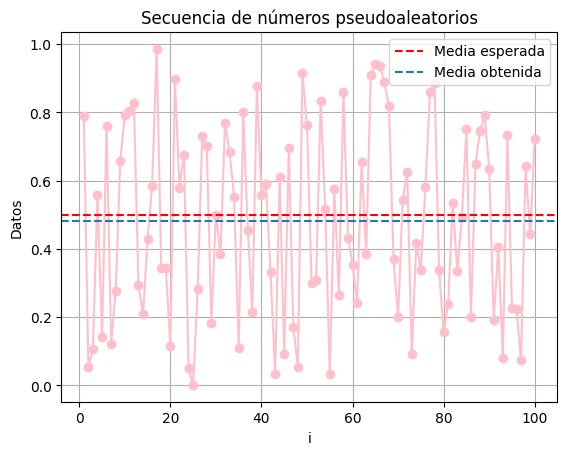

In [7]:
plt.figure()
plt.plot(range(1, len(data) + 1), data, marker="o", linestyle="-", color="pink")
plt.axhline(0.5, linestyle="--", color="red",label=f'Media esperada')  # media teórica
plt.axhline(x, linestyle="--",label=f'Media obtenida')  # media muestral
plt.xlabel("i")
plt.ylabel("Datos")
plt.title("Secuencia de números pseudoaleatorios")
plt.legend()
plt.grid(True)
plt.show()

Por ultimo se planteó una prueba de hipótesis bilateral con un nivel de significancia $\alpha$, calculando el estadístico de prueba $z_0$ y comparándolo con el valor crítico $z_\alpha / 2$ obtenido de la distribución normal estándar.